# Life Satisfaction
We will build Linear Regression to Predict Life Satisfaction of Country using GDP per Capita for that Country, usually this used to know if money makes people happy.
So we got 2 databases:
1. Better Life Index from [OECD's Website](https://stats.oecd.org/index.aspx?DataSetCode=BLI)
2. GDP per capita from [IMF's Website](https://www.imf.org/en/Publications/SPROLLS/world-economic-outlook-databases#sort=%40imfdate%20descending)

We will join them based on Country using **prepare_country_stats** method, then use **GDP per capita** Column as **X** and **Life satisfaction** as **y** to train the model.

Then we will use **model** to predict Life Satisfaction of Cypriots as OECD database does not have it

# 1. Download and Preprocess the Data

## 1.1 Download and Load Data

In [1]:
!git clone https://github.com/RiadKatby/machine-learning-models.git --depth 1

DATA_PATH = './machine-learning-models/datasets/lifesat/'

Cloning into 'machine-learning-models'...
Updating files:  13% (440/3330)
Updating files:  14% (467/3330)
Updating files:  15% (500/3330)
Updating files:  16% (533/3330)
Updating files:  17% (567/3330)
Updating files:  18% (600/3330)
Updating files:  19% (633/3330)
Updating files:  20% (666/3330)
Updating files:  21% (700/3330)
Updating files:  22% (733/3330)
Updating files:  23% (766/3330)
Updating files:  24% (800/3330)
Updating files:  25% (833/3330)
Updating files:  26% (866/3330)
Updating files:  27% (900/3330)
Updating files:  28% (933/3330)
Updating files:  29% (966/3330)
Updating files:  30% (999/3330)
Updating files:  30% (1001/3330)
Updating files:  31% (1033/3330)
Updating files:  32% (1066/3330)
Updating files:  33% (1099/3330)
Updating files:  34% (1133/3330)
Updating files:  35% (1166/3330)
Updating files:  36% (1199/3330)
Updating files:  37% (1233/3330)
Updating files:  38% (1266/3330)
Updating files:  39% (1299/3330)
Updating files:  40% (1332/3330)
Updating files:  41

In [2]:
import pandas as pd

oecd_bli = pd.read_csv(DATA_PATH + 'oecd_bli_2015.csv', thousands=',')
gdp_per_capita = pd.read_csv(DATA_PATH + 'gdp_per_capita.csv', thousands=',', delimiter='\t', encoding='latin1', na_values='n/a')

## 1.2 Preprocess Data

In [3]:
import numpy as np

def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]

# 2. Train the Model

In [4]:
import sklearn.linear_model

model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

# 3. Predicting Result

In [5]:
# Predict Cyprus. Its Life Satisfaction not in database, fortunatly we know it GDP per Capita
X_new = [[22587]] # GDP per Capita
print(model.predict(X_new))

[[5.96242338]]


# 4. Visualization

Text(0.5, 1.0, 'Raw Data')

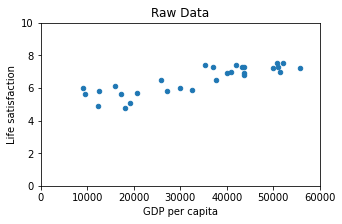

In [6]:
import matplotlib.pyplot as plt

country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
plt.title('Raw Data')

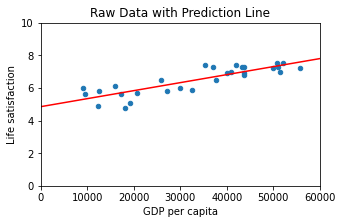

In [7]:
t0, t1 = model.intercept_[0], model.coef_[0][0]

country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
plt.title('Raw Data with Prediction Line')

fX=np.linspace(0, 60000, 1000)
plt.plot(fX, t0 + t1*fX, "r")